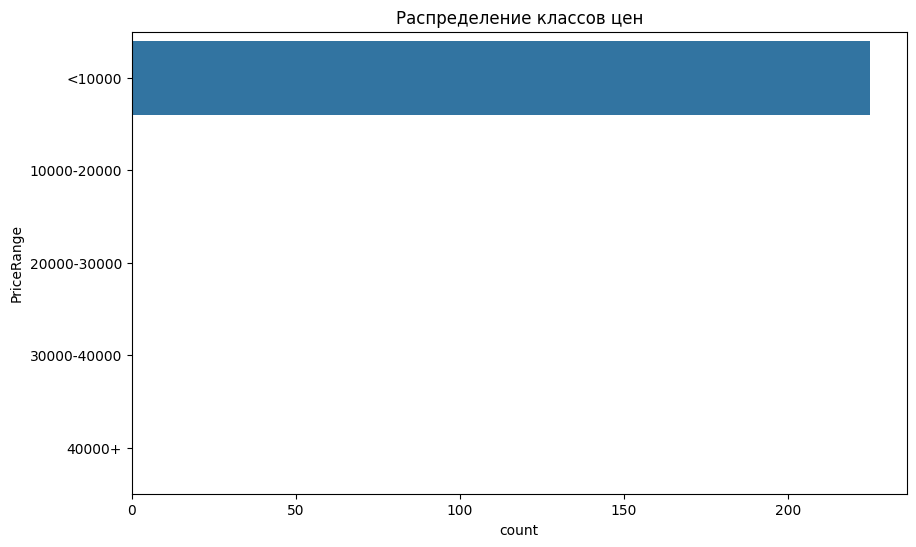

Accuracy:  1.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
df = pd.read_csv('intel-cpus.csv')

# Классификация цен
bins = [0, 10000, 20000, 30000, 40000, np.inf]
names = ['<10000', '10000-20000', '20000-30000', '30000-40000', '40000+']
df['`PriceRange`'] = pd.cut(df['Price'], bins, labels=names)

# Построим график распределения классов цен
plt.figure(figsize=(10,6))
sns.countplot(df['PriceRange'])
plt.title('Распределение классов цен')
plt.show()

# Предварительная обработка данных
# Кодирование категориальных функций
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['PriceRange'] = le.fit_transform(df['PriceRange'])

# Разделение на признаки и целевую переменную
X = df.drop(['Price', 'PriceRange'], axis=1)
y = df['PriceRange']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Создание и обучение модели дерева решений
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Проверка точности
print('Accuracy: ', accuracy_score(y_test, y_pred))

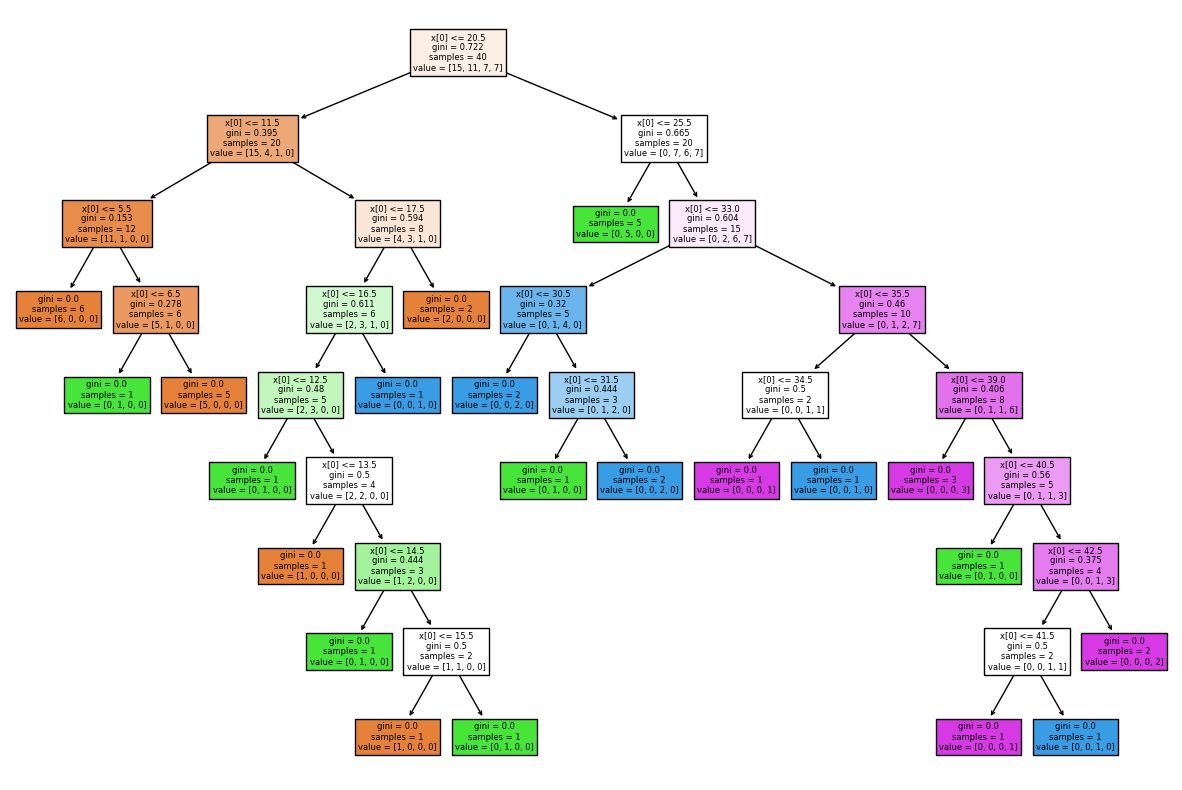

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()